# 移動ロボットの状態遷移（ノイズなし）

千葉工業大学 上田 隆一

(c) 2017 Ryuichi Ueda

This software is released under the MIT License, see LICENSE.

## はじめに

このコードは、移動ロボットの移動の簡単なモデルです。


In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt                   #   for plotting data

### 状態方程式に対応する関数

下の例について、関数fを書きましょう。

```python
old_x = np.array([0,0,0])    # 今回は不要だがnumpyを使用
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える

def f(x_old,u):
    なにかコードを書く
    return x_new
```

#### 解答例

In [9]:
def f(x_old,u):
    # わかりにくいのでバラす
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    pos_x += act_fw * math.cos(pos_theta)
    pos_y += act_fw * math.sin(pos_theta)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])

### 実行！

10ステップ動貸してみましょう。

In [10]:
x = np.array([0,0,0])
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える
print(x)
for i in range(10):
    x = f(x,u)
    print(x)

[0 0 0]
[ 0.1         0.          0.17453293]
[ 0.19848078  0.01736482  0.34906585]
[ 0.29245004  0.05156683  0.52359878]
[ 0.37905258  0.10156683  0.6981317 ]
[ 0.45565702  0.16584559  0.87266463]
[ 0.51993578  0.24245004  1.04719755]
[ 0.56993578  0.32905258  1.22173048]
[ 0.6041378   0.42302184  1.3962634 ]
[ 0.62150262  0.52150262  1.57079633]
[ 0.62150262  0.62150262  1.74532925]


### わからんので描画

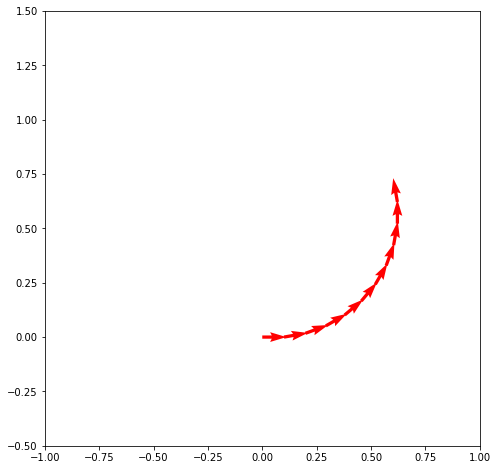

In [11]:
x = np.array([0,0,0])
u = np.array([0.1,10/180*math.pi]) # 毎回0.1だけ進めて10[deg]向きを変える

path = [x]
for i in range(10):
    x = f(x,u)
    path.append(x)

fig = plt.figure(i,figsize=(8, 8))
sp = fig.add_subplot(111, aspect='equal')
sp.set_xlim(-1.0,1.0)
sp.set_ylim(-0.5,1.5)
        
xs = [e[0] for e in path]
ys = [e[1] for e in path]
vxs = [math.cos(e[2]) for e in path]
vys = [math.sin(e[2]) for e in path]
plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")